<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Práctica 2. Fundamentos de programación para la física computacional </h2> 

---
### Alumno: Pérez Trejo Brandon Eliud
---

### **EJERCICIOS**:

$\;$

#### **1. Regla del trapecio.** El archivo _velocidades.txt_ (adjunto), contiene dos columnas de números, la primera representa el tiempo $t$ en segundos y la segunda la $x$-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo $t=0$ hasta $t=100$. Escribe un programa para hacer lo siguiente:

#### **(a)** Lee los datos y, usando la **regla del trapecio**, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la dirección $x$ como una función del tiempo.

In [1]:
#Importo las paqueterías que voy a usar
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Text(0, 0.5, 'velocidad')

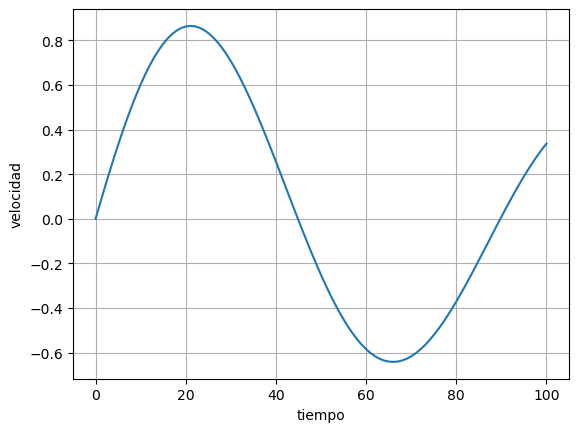

In [2]:
# Abro un buffer para leer el archivo
datos = open("velocidades.txt", 'r')

# Creo una lista vacía dónde guardar los datos de ese buffer y los guardo con un for
velocidades = []
for renglon in datos:
    velocidades.append(renglon)

# Ahora, cada línea de la lista velocidades la separo en 2 datos: tiempo y velocidad y los almaceno en listas vacías
tiempo = []
velocidad = []

for i in velocidades:
    linea = i.split("\t") #Separo cada renglón entre el dato de tiempo y el dato de velocidad y los convierto en flotantes
    tiempo.append(float(linea[0]))
    velocidad.append(float(linea[1]))

# Para imaginar cómo debe ser la integral de la función, la grafico.
plt.plot(tiempo,velocidad)
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("velocidad")

In [3]:
# Programo la regla del trapecio mediante una función
def trapecio(f,a,b,N):
    h = (b-a)/N 
    I = (f(a)+f(b))*h/2 
    for i in np.arange(1,N): # Uso un arange en vez de range para evitar errores en caso de que N no sea entero.
        I = I + h*f(a + i*h)
    return I

# Como en este caso no tengo una función explícita f, sino un conjunto de datos, hago algo similar a lo que hace la función "trapecio"
# esto es, aproximo el área bajo la curva calculando áreas de trapecios de bases f(x_i), f(x_(i-1)) y altura (x_i - x_(i-1))

I = 0
for i in range(1,len(tiempo)):
    I = I + (velocidad[i] + velocidad[i-1])*(tiempo[i] - tiempo[i-1])/2

print(I)
# Esta celda es innecesaria, pero antes de darme cuenta de mi error ya me había tomado el tiempo de hacerla

8.218924000000003


In [4]:
# La integral calculada antes no corresponde con la distancia recorrida sino al desplazamiento. 
# Como la distancia es una magnitud estrictamente positiva y en el caso anterior hay trapecios de área negativa, hago lo siguiente

# En t=0 y v=0, la distancia recorrida se esperaría fuese cero
distancia = []

for i in range(1,len(tiempo)): # Al igual que antes calculo el área de cada trapecio para t mayor que cero
    I = (velocidad[i] + velocidad[i-1])*(tiempo[i] - tiempo[i-1])/2
    if (I>=0): # Si es positivo lo agrego a la lista
        distancia.append(I)
    else: # Si no es positivo, lo vuelvo positivo (por tricotomía no hay otro caso)
        distancia.append((-1)*I)

# Finalmente, la distancia recorrida se aproxima a la suma del area de los trapecios
print("La distancia total recorrida por la partícula en dirección x, es d=",sum(distancia))

La distancia total recorrida por la partícula en dirección x, es d= 44.757957


#### **(b)** Extiende tu programa para hacer una gráfica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una función del tiempo.

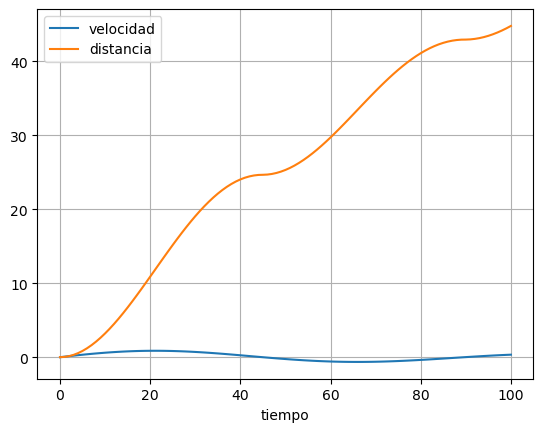

In [5]:
# Para conocer la distancia aproximada recorrida en un cierto tiempo, debo ir sumando cada valor de la lista distancia
# Creo una lista con el cero pues en t=0 la distancia recorrida es cero y un contador d
d_recorrida = [0]
d = 0

for i in distancia: # Al valor d=0 le voy sumando las contribuciones de cada trapecio y guardándolos en d_recorrida
    d = d + i
    d_recorrida.append(d)

# Finalmente grafico el tiempo contra la velocidad y la distancia, cada una con su etiqueta
plt.plot(tiempo,velocidad, label='velocidad')
plt.plot(tiempo,d_recorrida, label='distancia')
plt.grid()
plt.xlabel("tiempo")
plt.legend()

#### **2. El límite de difracción de un telescopio** Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a través de la apertura circular que consta de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción está dada por:

$$
    I(r)= \bigg{(} \frac{J_1(kr)}{kr} \bigg{)} ^2
$$

#### donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k=2\pi/\lambda$ y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m(x)$ están dadas por:

$$
    J_m(x)=\frac{1}{\pi}\int_0^{\pi}\cos{(m\theta-x\sin{(\theta)})}d\theta
$$

#### donde $m$ es un entero no negativo y $x\geq 0$

#### **(a)** Escribe una función $J(m,x)$ que calcule el valor de $J_m(x)$ usando la regla de Simpson con $N=1000$ puntos. Utiliza dicha función en un programa para graficar, en un sólo gráfico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como una función de $x$ (de $x=0$ a $x=20$).

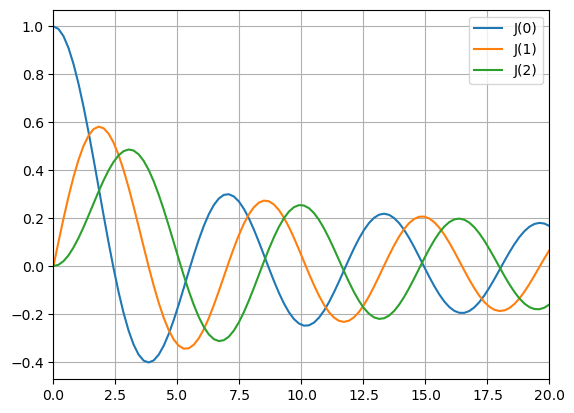

In [6]:
# Primero defino una función para la regla de Simson
def simpson(f,a,b,N):
    h = (b-a)/N 
    I = (f(a)+f(b))*h/3 # Simpson tiene 2 sumas y un valor inicial fijo
    for i in np.arange(1,N/2):
        I = I + 2*(h/3)*f(a+2*i*h) # La primera suma corresponde a los múltiplos de h pares
    for k in np.arange(0,N/2):
        I = I + 4*(h/3)*f(a+(2*k+1)*h) # La segunda suma corresponde a los múltiplos de h impares
    return I

def J(m,x):
    def F(t): # Como la función simpson requiere una función de una sola variable, la defino dentro de J para que dependa solo de t y no de m y x
        return np.cos(m*t-x*np.sin(t))
    return (1/np.pi)*simpson(F,0,np.pi,1000)
    
# Para graficar, defino una lista con los puntos de donde van a tomar sus valores J0, J1 y J2
dominio = np.linspace(0,20,100)

# Hago las 3 gráficas al mismo tiempo con un ciclo for
for i in range(0,3):
    plt.plot(dominio,J(i,dominio),label="J("+str(i)+")")

plt.grid()
plt.xlim(0,20)
plt.legend()

#### **(b)** Compara tus resultados con los proporconados con la biblioteca de _scipy_ que implementa la regla de Simpson.

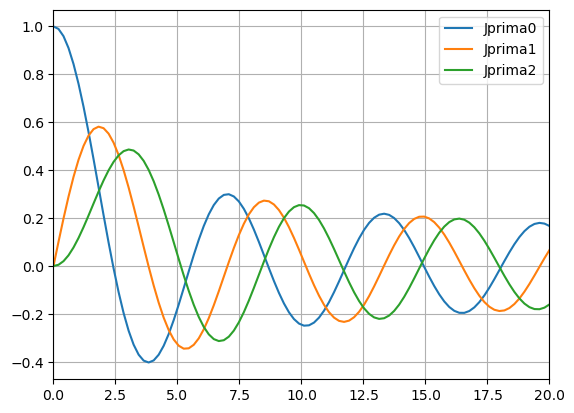

In [7]:
# Como la integral está en la definición de J, defino otra función llamada Jprima con unas modificaciones

def Jprima(m,x): # Siguen siendo las funciones de Bessel para un m dado, así que depende de m y x
    def F(t): # Igual que antes, la función a integrar debe depender solo de una variable, así que la defino adentro de Jprima
        return np.cos(m*t-x*np.sin(t)) 
        
    # A comparación con el caso anterior, la función sp.integrate.simpson recibe listas y no la función a integrar directamente.    
    theta = np.linspace(0,np.pi,1000) # La lista del dominio contiene valores que puede tomar t en el intervalo de integración [0,pi]
    f_theta = F(theta) # La lista del contradominio son los valores de F evaluados en cada valor de theta
    return (1/np.pi)*sp.integrate.simpson(f_theta,x=theta) # Los argumentos de simson son (y,x) donde "y" son los valores de la función F evaluada en t

# Por alguna razón que no comprendo, la función Jprima no me permitió hacer lo de antes de evaluarla en una lista completa J(m,lista).
# Así que para graficar las funciones de Bessel, lo haré por medio de mas listas D:
# Defino listas vacías que corresponden a los valores de Jm(x) para m=0,1,2
Jprima0 = []
Jprima1 = []
Jprima2 = []

# La siguiente lista corresponde a los valores que x va a tomar entre 0 y 20
puntos = np.linspace(0,20,100)

for i in puntos: # A cada lista vacía que definí antes le voy a agregar Jprima evaluada en un m específico y en un x en puntos
    Jprima0.append(Jprima(0,i)) 
    Jprima1.append(Jprima(1,i))
    Jprima2.append(Jprima(2,i))

# Por último, grafico las 3 funciones de Bessel por medio de arreglos
plt.plot(puntos,Jprima0, label = "Jprima0")
plt.plot(puntos,Jprima1, label = "Jprima1")
plt.plot(puntos,Jprima2, label = "Jprima2")

# Añado una cuadríacula, etiquetas y un límite para que se vean mejor.
plt.grid()
plt.xlim(0,20)
plt.legend()

#### **(c)** Escribe un segundo programa que haga una gráfica de densidad (_density plot_) de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda =500\ nm$, en una región cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de $r$ desde cero hasta a´proximadamente $1\ \mu m$.

In [8]:
# Para hacer una gráfica de densidad importo la función imshow de un módulo de matplotlib
from matplotlib.pylab import imshow

# Después defino mis constantes: la longitud de onda (en metros) y el número de onda k
lamb = 500e-9 # metros
k = (2*np.pi)/lamb

# Ahora, si la intensidad depende del radio, pueso expresar r como la raíz de x**2+y**2 por lo que defino los valores a la redonda de x e y
x = np.linspace(-1e-6,1e-6,500) # Desde -1 micrómetro hasta 1 micrómetro. Con 500 espacios entre ellos
y = np.linspace(-1e-6,1e-6,500)

# Defino la función intensidad en términos de x e y
def I(x,y):
    r = np.sqrt(x**2 + y**2) # Defino mi variable r para que la función se vea como en la definición
    if (r == 0):
        return 0.25 # Si r=0, entonces tengo algo de la forma J1(0)/0 y por el hint, eso tiende a 1/2. Elevando al cuadrado obtengo 1/4 = 0.25
    else:
        return ( J(1,k*r)/(k*r) )**2

# Aquí me tomé casi todo el día intentando hacer la gráfica. Para usar imshow debía de contruir un arreglo de arreglos, para ello había hecho -
# -dos ciclos for en donde x e y tomarían sus valores, pero para 100 se tardaba mucho y para 500 ya no jalaba. Además, la gráfica parecía una -
# -elipse vertical aplastada muy pixeleada. Así que, utilicé la función meshgrid de numpy y para evaluar estos valores después en I, requería -
# -que x e y no valieran cero al mismo tiempo para evitar la división entre cero. Con la partición adecuada del intervalo (-1e-6,1e-6), el cero -
# -no es un elemento. En este caso, para 500 valores del intervalo, no lo es.
for i in x:
    if i==0:
        print('hay un cero')

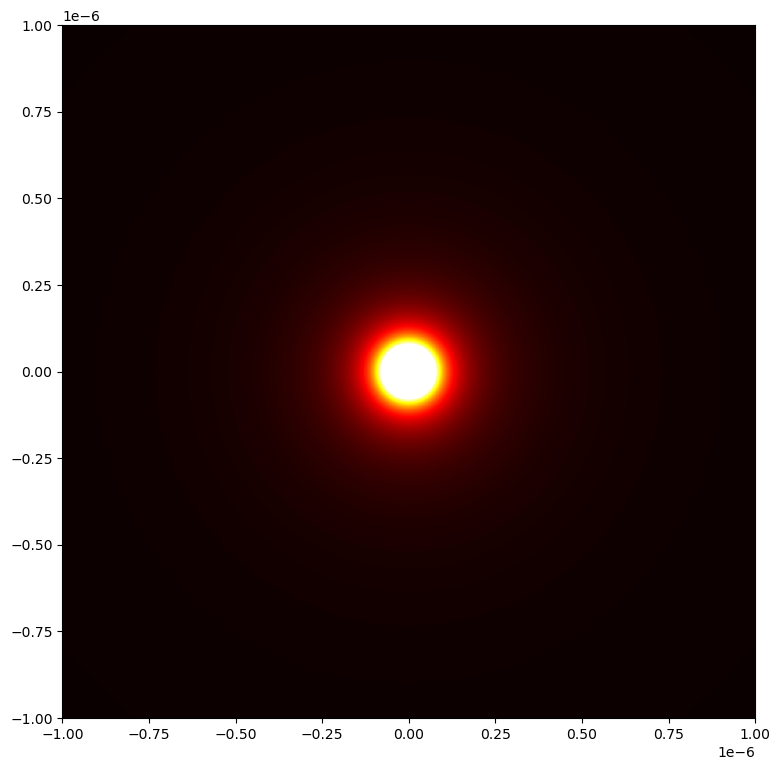

In [9]:
# Por lo que encontré sobre meshgrid, me da dos matrices xv y yv que corresponden a los valores que x e y pueden tomar en el plano
# Por lo anterior, me marca error si intento evaluar mi función I(x,y) en ellos.
xv,yv = np.meshgrid(x,y)

# En lugar de usar mi función I(x,y), defino una nueva variable que en realidad es un vector de vectores, una matriz de 500x500
# -esta matriz contiene los valores de I en cada punto del plano según los valores que x e y podían tomar, excepto el cero claro
I = (J(1,np.sqrt(xv**2 + yv**2))/(k*(xv**2 + yv**2)))**2

# Para que se vea mejor la gráfica la hago más grande
plt.figure(figsize=(9,9))

# Finalmente, grafico I con "hot" y defino valores máximos y mínimos para la intensidad. 
# vmin = 0 pues la mínima intensidad es que no se vea
# vmax = 0.25 pues el centro de la fuente de la luz es el lugar más intenso y justamente sé que en r=0, I=0.25
imshow(I,cmap='hot',aspect='equal',vmin=0,vmax=0.25,extent=[-1e-6,1e-6,-1e-6,1e-6])

#### **3. Capacidad calorífica de un sólido.** La _teoría de sólidos de Debye_ dice que la _capacidad calorífica_ de un sólido a una temperatura $T$ está dada por:

$$
    C_V=9V\rho k_B \left( \frac{T}{\theta _D} \right)^3 \int _0^{\theta _D /T} \frac{x^4 e^x}{(e^x-1)^2}dx
$$

#### donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $k_B$ es la constante de Boltzmann y $\theta _D$ es la llamada _temperatura de Debye_, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.

#### **(a)** Escribe una función $C_V(T)$ que calcule la $C_V$ para un valor dado de temperatura, de una muestra que consta de $1000$ centímetros cúbicos de aluminio sólido, con densidad numérica de $\rho = 6.022 \times 10^{28}\ m^{-3}$ y una temperatura de Debye de $\theta _D=428\ K$. Utiliza la **cuadratura gaussiana** para evaluar la integral, con $N=50$ _puntos muestra._

In [38]:
# Para escribir la función, primero defino mis constantes:
V = 0.001 # metros cúbicos
R = 6.022e28 # metros ^-3
tD = 428 # Kelvin
kB = 1.38065e-23 # joules sobre kelvin

# Ahora defino una función que integre con el método de cuadratura Gaussina. 
def gaussiana(f,a,b):
    dominio = np.linspace(-1,1,500)
    def normalizador(x):
        return ((b-a)*x/2 + (b+a)/2)
    dominio_prima = list(map(normalizador,dominio))
    peso = np.polynomial.legendre.leggauss(500)[1]
    I = 0
    for i in range(1,500):
        I += f(dominio_prima[i])*((b-a)/2)*(peso[i])
    return I

def F(x):
    return ((x**4)*np.exp(x))/((np.exp(x)-1)**2)
k=100
print(gaussiana(F,1,k))

5.04203501912642


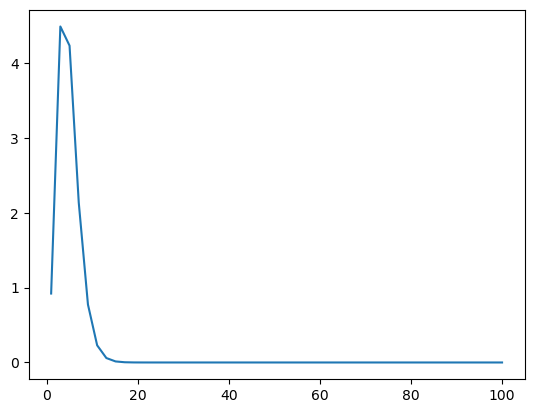

In [37]:
dom = np.linspace(1,100,50)
plt.plot(dom, F(dom))

In [27]:
#def gaussiana(f,a,b):
dominio = np.linspace(-1,1,50)
a = 0
b = 
def normalizador(x):
    return ((b-a)*x/2 + (b+a)/2)
dominio_prima = list(map(normalizador,dominio))
peso = np.polynomial.legendre.leggauss(50)[1]
I = []
for i in range(1,50):
    lista = F(dominio_prima[i])*((b-a)/2)*(peso[i])
    I.append(lista)

sum(I)

15.576945377155365

#### **(b)** Usa tu función para hacer una gráfica de la capacidad calorífica en función de la temperatura desde $T=5\ K$ hasta $T=500\ K$.

#### **Atracción gravitacional de una lámina uniforme.** Una lámina de metal cuadrada uniforme flota inmóvil en el espacio. La lámina mide $10\ m$ de lado, tiene un espesor insignificante y una masa de $10$ toneladas.

#### **(a)** Considera la fuerza gravitacional debida a la placa que siente una masa puntual de $1\ Kg$ a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z es

$$
    F_z=G\sigma z\int \int _{-L/2}^{L/2} \frac{dxdy}{(x^2+y^2+z^2)^{3/2}}
$$

#### donde $G=6.674 \times 10^{-11} m^3 Kg^{-1}s^{-2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de área de la hoja.

#### **(b)** Escribe un programa para calcular y graficar la fuerza en función de $z$ de $z=0$ hasta $z=10\ m$. Para la integral doble utiliza la cuadratura Gaussiana (doble)

$$
    I=\sum _{i=1}^N\sum _{j=1}^N\omega _i \omega _j f(x_i,x_j)
$$

#### con $100$ puntos de muestra a lo largo de cada eje.

#### **(c)** Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerza debería caer repentinamente a cero. Esta caída no es un efecto real, suno un artefacto de la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategia para eliminarlo, o al menos disminuir su tamaño.